In [0]:
import torch

In [2]:
torch.manual_seed(0)

In [0]:
torch.backends.cudnn.deterministic=True
torch.backends.cudnn.benchmark=False

In [0]:
import numpy as np
np.random.seed(0)

In [12]:
print(torch.cuda.is_initialized())

False


In [0]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [11]:
device

device(type='cuda')

In [0]:
import torchvision

In [0]:
mean,std = (0.5,),(0.5,)

In [0]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),torchvision.transforms.Normalize(mean,std)])

In [19]:
traindataset = torchvision.datasets.FashionMNIST('~/data/FMNIST/',download=True,train=True,transform=transform)


Extracting /root/data/FMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/data/FMNIST/FashionMNIST/raw



Extracting /root/data/FMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/data/FMNIST/FashionMNIST/raw



Extracting /root/data/FMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/data/FMNIST/FashionMNIST/raw



Extracting /root/data/FMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/data/FMNIST/FashionMNIST/raw
Processing...
Done!


In [0]:
testdataset = torchvision.datasets.FashionMNIST('~/data/FMNIST/',download=True,train=False,transform=transform)

In [0]:
trainloder = torch.utils.data.DataLoader(traindataset,batch_size=64,shuffle=True)
testloder = torch.utils.data.DataLoader(testdataset,batch_size=64,shuffle=True)

In [0]:
from torch import nn

In [0]:
from torch.nn import functional as F

In [83]:
class FMNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(in_features=28*28,out_features=128)
    self.fc2 = nn.Linear(in_features=128,out_features=64)
    self.fc3 = nn.Linear(in_features=64,out_features=10)

  def forward(self,x):
    return F.log_softmax(self.fc3(F.relu(self.fc2(F.relu(self.fc1(x.view(x.shape[0],-1)))))),dim=1) 
model = FMNIST() 
model
model.to(device)

FMNIST(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [70]:
class FMNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)
    
  def forward(self, x):
    x = x.view(x.shape[0], -1)
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)
    
    return x

model = FMNIST()
model
model.to(device)

FMNIST(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [84]:
from torch import optim
optimizer = optim.SGD(model.parameters(),lr=0.01)
criterion=nn.NLLLoss()
epoch=30
train_tracker,test_tracker,accuracy_tracker = [],[],[]
for i in range(epoch):
  cum_loss = 0
  for images, labels in trainloder:
    images = images.to(device)
    labels = labels.to(device)    
    optimizer.zero_grad()
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    cum_loss += loss.item()
  train_tracker.append(cum_loss/len(trainloder))
  print(f"Epoch({i+1}/{epoch}) | Training loss: {cum_loss/len(trainloder)} | ",end = ' ')

  test_loss = 0
  num_correct = 0
  total = 0
  for images, labels in testloder:
    images = images.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    logps = model(images)
    test_loss += criterion(logps, labels).item()
    output = torch.exp(logps)
    pred = torch.argmax(output,1)
    num_correct += (pred==labels).sum().item()
    total += labels.size(0)
  
  test_tracker.append(test_loss/len(testloder))
  accuracy_tracker.append(num_correct/total)
  print(f"| Testing loss: {test_loss/len(testloder)} | ",end = ' ')
  print(f"| Accuracy: {num_correct * 100 /total} %")
print(f'Accuracy of the model after 30 epochs on the 10000 test images: {num_correct * 100 / total}% ')


Epoch(1/30) | Training loss: 0.999520721910859 |  | Testing loss: 0.6248177625950734 |  | Accuracy: 77.21 %
Epoch(2/30) | Training loss: 0.5524702418460521 |  | Testing loss: 0.536660691355444 |  | Accuracy: 80.93 %
Epoch(3/30) | Training loss: 0.4854096622863558 |  | Testing loss: 0.4915170369634203 |  | Accuracy: 82.22 %
Epoch(4/30) | Training loss: 0.45190612318864 |  | Testing loss: 0.4764658898874453 |  | Accuracy: 82.59 %
Epoch(5/30) | Training loss: 0.42956433631082586 |  | Testing loss: 0.45451362260208006 |  | Accuracy: 83.43 %
Epoch(6/30) | Training loss: 0.4123155334865106 |  | Testing loss: 0.46517528299313443 |  | Accuracy: 83.25 %
Epoch(7/30) | Training loss: 0.39925248104372 |  | Testing loss: 0.43898649940824813 |  | Accuracy: 83.81 %
Epoch(8/30) | Training loss: 0.38647822662393677 |  | Testing loss: 0.4229245201037948 |  | Accuracy: 84.72 %
Epoch(9/30) | Training loss: 0.3764967799885695 |  | Testing loss: 0.4140306332498599 |  | Accuracy: 85.24 %
Epoch(10/30) | Train

In [85]:
num_correct = 0
total = 0
for images, labels in testloder:
  images = images.to(device)
  labels = labels.to(device)
  optimizer.zero_grad()
  logps = model(images)
  output = torch.exp(logps)
  pred = torch.argmax(output,1)
  num_correct += (pred==labels).sum().item()
  total += labels.size(0)
print(f'Accuracy of the model after 30 epochs on the 10000 test images: {num_correct * 100 / total}% ')

Accuracy of the model after 30 epochs on the 10000 test images: 87.18% 


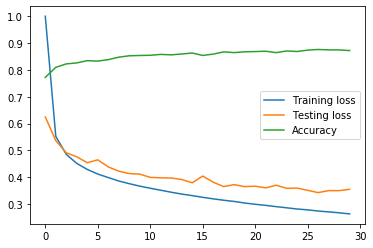

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(train_tracker,label='Training loss')
plt.plot(test_tracker,label='Testing loss')
plt.plot(accuracy_tracker,label='Accuracy')
plt.legend()